In [1]:
#!pip install langdetect

In [2]:
import pandas as pd
import numpy as np
import tqdm

In [13]:
df_raw = pd.read_csv("df_Settore.csv")
df_raw

,ID_General,Piattaforma,Settore,Utilizzo_software,Consigliato,Data_Recensione,Vantaggi,Lang,bin_y
0,0 Go_To_Meeting,Go_To_Meeting,Information Technologies,Più di 2 anni,10.0,26/3/2020,I've tried other solutions and for me the best...,en,1.0
1,0 Microsoft_Teams,Microsoft_Teams,Science & Pharmaceutical,Più di 2 anni,8.0,23/6/2020,the integration with sharepoint and office 365...,en,1.0
2,0 WebEx,WebEx,Enginering & Manufactoring,Più di 2 anni,8.0,25/7/2019,webex is really easy to use and setup! from bo...,en,1.0
3,1 Asana,Asana,Public Services & Administration,Più di 2 anni,10.0,10/06/2019,It's very easy to implement and to onboard new...,en,1.0
4,1 Go_To_Meeting,Go_To_Meeting,Property & Constructions,6-12 mesi,8.0,8/11/2020,"As the review title, I can confirm this is for...",en,1.0
...,...,...,...,...,...,...,...,...,...
32600,999 Go_To_Meeting,Go_To_Meeting,Hospitality & Event Managements,Più di 1 anno,10.0,12/9/2019,How easy it is to operate. You can get right o...,en,1.0
32601,999 Google_Meet,Google_Meet,Information Technologies,Più di 2 anni,10.0,12/3/2019,The least I like about this software of google...,en,1.0
32602,999 Microsoft_Teams,Microsoft_Teams,"Accountancy, Banking & Finance",Più di 2 anni,9.0,21/9/2020,what i like most about this software is the co...,en,1.0
32603,999 TeamViewer,TeamViewer,Healthcare,Più di 2 anni,9.0,07/11/2020,It's pretty simple to use and allows you to ha...,en,1.0


In [14]:
len(df_raw)
#missingValueMask = df_raw.loc[:,'Commenti'].isna()
#print(df_raw.loc[missingValueMask,:].shape)

32605

In [5]:
df_raw.Settore.value_counts()

Information Technologies             6548
Teacher training & Education         3338
Marketing, Advertising & PR          2551
Accountancy, Banking & Finance       2219
Healthcare                           2199
Enginering & Manufactoring           2004
Media & Internet                     1974
Retail                               1474
Charity & Voluntary Work             1314
Leisure, sport & Turism              1301
Business, Consulting & Management    1204
Creative Arts & Design               1042
Property & Constructions             1030
Transports Logistics                  664
Hospitality & Event Managements       609
Recruitment & HR                      530
Law & Security                        497
Public Services & Administration      476
Science & Pharmaceutical              437
Energy & Utilities                    332
Sales                                 267
Environment & Agricolture             251
Social Care                           173
Aerospace                         

In [15]:
df_01 = df_raw[df_raw.bin_y==1]
df_01

,ID_General,Piattaforma,Settore,Utilizzo_software,Consigliato,Data_Recensione,Vantaggi,Lang,bin_y
0,0 Go_To_Meeting,Go_To_Meeting,Information Technologies,Più di 2 anni,10.0,26/3/2020,I've tried other solutions and for me the best...,en,1.0
1,0 Microsoft_Teams,Microsoft_Teams,Science & Pharmaceutical,Più di 2 anni,8.0,23/6/2020,the integration with sharepoint and office 365...,en,1.0
2,0 WebEx,WebEx,Enginering & Manufactoring,Più di 2 anni,8.0,25/7/2019,webex is really easy to use and setup! from bo...,en,1.0
3,1 Asana,Asana,Public Services & Administration,Più di 2 anni,10.0,10/06/2019,It's very easy to implement and to onboard new...,en,1.0
4,1 Go_To_Meeting,Go_To_Meeting,Property & Constructions,6-12 mesi,8.0,8/11/2020,"As the review title, I can confirm this is for...",en,1.0
...,...,...,...,...,...,...,...,...,...
32600,999 Go_To_Meeting,Go_To_Meeting,Hospitality & Event Managements,Più di 1 anno,10.0,12/9/2019,How easy it is to operate. You can get right o...,en,1.0
32601,999 Google_Meet,Google_Meet,Information Technologies,Più di 2 anni,10.0,12/3/2019,The least I like about this software of google...,en,1.0
32602,999 Microsoft_Teams,Microsoft_Teams,"Accountancy, Banking & Finance",Più di 2 anni,9.0,21/9/2020,what i like most about this software is the co...,en,1.0
32603,999 TeamViewer,TeamViewer,Healthcare,Più di 2 anni,9.0,07/11/2020,It's pretty simple to use and allows you to ha...,en,1.0


In [16]:
df_01.Settore.value_counts()
df_01.bin_y.value_counts()

1.0    25815
Name: bin_y, dtype: int64

In [3]:
df_01 = pd.read_csv("df_settore.csv")

In [4]:
text_0 = df_01['Vantaggi']
y = df_01['bin_y'].tolist()
display(text_0[5:9])
#df_01.to_csv('df_vantaggi.csv', index=None)

5    Hangouts Meet is already available from within...
6    the biggest strength, by far, is the integrati...
7    You'll be able to utilize this software to rem...
8    despite having many features, which can somewh...
Name: Vantaggi, dtype: object

In [5]:
from tqdm import tqdm
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

#regex rimuoviamo la punteggiatura
text = text_0.str.lower().str.replace('[^\w\s]','')
#seperiamo il testo con split
text = text.str.split()
# text = text.apply(lambda x: [lemmatizer.lemmatize(word) for sentence in x for word in sentence])
text = text.apply(lambda x: [lemmatizer.lemmatize(sent) for sent in x])
#print(text[5])

In [6]:
from gensim.models.phrases import Phrases
#from nltk.corpus import stopwords
#stop = stopwords.words('english')
stop_words = pd.read_csv('stop_list.txt', sep=" ", header=None)
stop = stop_words[0].tolist()
stop.extend(['good', 'bad', 'dont', 'many', 'love', 'excellent', 'would', 'perfect', 'even', 'great'])


#min_count=entrambe le parole devono comparire almeno 5volte
#thresold=frequenza quante volte compaiono una dopo l'altra
#common_terms=vengono inseriti in mezzo se presenti, mai all'inizio o fine
bigram = Phrases(text, min_count=5, threshold=0.5, common_terms=stop)

#print(bigram[text[5]])

In [7]:
print(bigram[text[1]])
trigram = Phrases(bigram[text], threshold=0.1)
print(trigram[text[1]])

['the', 'integration_with_sharepoint', 'and', 'office_365', 'tool', 'is', 'really', 'awesome', 'work', 'very', 'well', 'and', 'also', 'you', 'can', 'create', 'and', 'builtin', 'apps', 'from', 'power', 'plataform', 'inside', 'your', 'team', 'group', 'and', 'do', 'not', 'forget', 'that', 'you', 'have', 'all', 'the', 'office_365', 'apps', 'to', 'integrate', 'within', 'your', 'group', 'the', 'number', 'of', 'the', 'apps', 'will', 'vary', 'depending', 'on', 'your', 'signature']
['the_integration', 'with_sharepoint', 'and', 'office_365', 'tool_is', 'really_awesome', 'work_very', 'well_and', 'also_you', 'can_create', 'and', 'builtin', 'apps', 'from', 'power', 'plataform', 'inside', 'your_team', 'group_and', 'do_not', 'forget', 'that_you', 'have_all', 'the_office', '365', 'apps_to', 'integrate', 'within_your', 'group', 'the_number', 'of_the', 'apps', 'will', 'vary', 'depending_on', 'your', 'signature']


In [8]:
bigrams = [bigram[item] for item in text]
ngrams = [bigram[item] for item in bigrams] #4gram bigram del bigram
nngrams = [bigram[item] for item in ngrams]
#print(ngrams[5])
#print(nngrams[5])

In [9]:
#from nltk.corpus import stopwords
#stop = stopwords.words('english')
stop = stop_words[0].tolist()
stop.extend(['good', 'bad', 'dont', 'many', 'love', 'excellent', 'would', 'perfect', 'even', 'great', 'also'])
print(ngrams[0])
train_sentences = []
for row in ngrams:
    train_sentences.append(' '.join([item for item in row if item not in stop]))
# train_sentences = [' '.join(item) for item in ngrams]
train_sentences[0]

['ive', 'tried', 'other', 'solution', 'and', 'for', 'me', 'the', 'best', 'from', 'this', 'solution', 'is', 'how', 'easy', 'is', 'to', 'access', 'to', 'the', 'conference', 'for', 'my', 'customer', 'just', 'one', 'click', 'and', 'they', 'are', 'inside', 'the', 'conference']


'tried solution solution access conference customer click inside conference'

In [10]:
df_01['Vantaggi'] = train_sentences
#df_01.to_csv('df_vantaggi_no_stop_words.csv', index=None)

In [11]:
corpus = df_01['Vantaggi']
corpus = corpus.str.split()
corpus = corpus.apply(lambda x: [lemmatizer.lemmatize(item) for item in x if item not in stop])
corpus = corpus.apply(lambda x: [item for item in x if not item.isnumeric()])
corpus

0        [tried, solution, solution, access, conference...
1        [integration_with_sharepoint, office_365, awes...
2        [setup, view, point, admin, setting, end, invi...
3        [implement, onboard, new, interface, attractiv...
4        [review, title, confirm, conference, support, ...
                               ...                        
32600          [operate, right, call, right_away, clarity]
32601    [least, sometimes, receive, notification, phon...
32602    [communication, piece, find, communicate, whet...
32603    [remote_access, another, help, youre_trying, h...
32604    [customer, talk, via, prior, experience, intui...
Name: Vantaggi, Length: 32605, dtype: object

In [12]:
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
#limitare le features per overfitting
#vectorizer = CountVectorizer(ngram_range=(1, 1), max_features=1000)
vectorizer = TfidfVectorizer(ngram_range=(1, 5), max_features=1000)
X = vectorizer.fit_transform(train_sentences)
#riottengo il nome delle features che prima sono 
#state converite in chiavi numeriche
feature_names = vectorizer.get_feature_names()
#X = X.toarray()
#le porti in nparray
X = np.array(X)
y = np.array(y)

In [ ]:
print(feature_names)

In [13]:
from gensim.models import FastText
%time ft_model = FastText(sg=0, sentences=corpus, size=100, window=5, min_count=10, iter=20, min_n=3, max_n=10)
%time ft_model_2 = FastText(sg=0, sentences=corpus, size=100, window=5, min_count=20, iter=20, min_n=3, max_n=9)
%time ft_model_3 = FastText(sg=1, sentences=corpus, size=100, window=5, min_count=10, iter=20, min_n=3, max_n=9)
%time ft_model_4 = FastText(sg=1, sentences=corpus, size=100, window=5, min_count=20, iter=20, min_n=3, max_n=10)
%time ft_model_5 = FastText(sg=0, sentences=corpus, size=150, window=5, min_count=10, iter=50, min_n=3, max_n=10)
%time ft_model_6 = FastText(sg=0, sentences=corpus, size=150, window=5, min_count=10, iter=50, min_n=3, max_n=8)
%time ft_model_7 = FastText(sg=1, sentences=corpus, size=200, window=5, min_count=10, iter=50, min_n=3, max_n=7)
%time ft_model_8 = FastText(sg=1, sentences=corpus, size=200, window=5, min_count=20, iter=50, min_n=3, max_n=8)
%time ft_model_9 = FastText(sg=1, sentences=corpus, size=100, window=5, min_count=10, iter=50, min_n=3, max_n=8)
%time ft_model_10 = FastText(sg=1, sentences=corpus, size=200, window=5, min_count=20, iter=50, min_n=3, max_n=9)
%time ft_model_11 = FastText(sg=1, sentences=corpus, size=100, window=5, min_count=10, iter=50, min_n=3, max_n=10)
%time ft_model_12 = FastText(sg=1, sentences=corpus, size=100, window=5, min_count=15, iter=50, min_n=3, max_n=9)
%time ft_model_13 = FastText(sg=0, sentences=corpus, size=100, window=5, min_count=15, iter=50, min_n=3, max_n=9, word_ngrams=2)
%time ft_model_14 = FastText(sg=0, sentences=corpus, size=100, window=5, min_count=20, iter=50, min_n=3, max_n=9, word_ngrams=3)
%time ft_model_15 = FastText(sg=0, sentences=corpus, size=100, window=5, min_count=20, iter=50, min_n=3, max_n=9, word_ngrams=4)
%time ft_model_16 = FastText(sg=0, sentences=corpus, size=100, window=5, min_count=20, iter=50, min_n=3, max_n=10, word_ngrams=4)
%time ft_model_17 = FastText(sg=0, sentences=corpus, size=150, window=5, min_count=20, iter=50, min_n=3, max_n=10, word_ngrams=4)

Wall time: 43 s


In [16]:
ft_model.wv.save_word2vec_format('./vantaggi/settore/ft_model.vec', binary=False)
ft_model_11.wv.save_word2vec_format('./vantaggi/settore/ft_model_13.vec', binary=False)
ft_model_13.wv.save_word2vec_format('./vantaggi/settore/ft_model_13.vec', binary=False)

In [20]:
ft_model.wv.save_word2vec_format('./vantaggi/settore/ft_model.vec', binary=False)
ft_model_2.wv.save_word2vec_format('./vantaggi/settore/ft_model_2.vec', binary=False)
ft_model_3.wv.save_word2vec_format('./vantaggi/settore/ft_model_3.vec', binary=False)
ft_model_4.wv.save_word2vec_format('./vantaggi/settore/ft_model_4.vec', binary=False)
ft_model_5.wv.save_word2vec_format('./vantaggi/settore/ft_model_5.vec', binary=False)
ft_model_6.wv.save_word2vec_format('./vantaggi/settore/ft_model_6.vec', binary=False)
ft_model_7.wv.save_word2vec_format('./vantaggi/settore/ft_model_7.vec', binary=False)
ft_model_8.wv.save_word2vec_format('./vantaggi/settore/ft_model_8.vec', binary=False)
ft_model_9.wv.save_word2vec_format('./vantaggi/settore/ft_model_9.vec', binary=False)
ft_model_10.wv.save_word2vec_format('./vantaggi/settore/ft_model_10.vec', binary=False)
ft_model_11.wv.save_word2vec_format('./vantaggi/settore/ft_model_11.vec', binary=False)
ft_model_12.wv.save_word2vec_format('./vantaggi/settore/ft_model_12.vec', binary=False)

In [64]:
ft_model_13.wv.save_word2vec_format('./vantaggi/settore/ft_model_13.vec', binary=False)

In [68]:
ft_model_14.wv.save_word2vec_format('./vantaggi/settore/ft_model_14.vec', binary=False)
ft_model_15.wv.save_word2vec_format('./vantaggi/settore/ft_model_15.vec', binary=False)
ft_model_16.wv.save_word2vec_format('./vantaggi/settore/ft_model_16.vec', binary=False)
ft_model_17.wv.save_word2vec_format('./vantaggi/settore/ft_model_17.vec', binary=False)
#ft_model_13.wv.save_word2vec_format('./vantaggi/settore/ft_model_13.vec', binary=False)

In [82]:
#w2v_model.most_similar('zoom', topn = 20)
#w2v_model_2.most_similar('zoom', topn = 20)
#w2v_model_3.most_similar('zoom', topn = 20)
#w2v_model_4.most_similar('zoom', topn = 20)
#w2v_model_5.most_similar('zoom', topn = 20)
#w2v_model_6.most_similar('zoom', topn = 20)
#w2v_model_7.most_similar('zoom', topn = 20)
#w2v_model_8.most_similar('zoom', topn = 20)
#w2v_model_9.most_similar('zoom', topn = 20)
#w2v_model_10.most_similar('teamviewer', topn = 20)
#w2v_model_11.most_similar('webex', topn = 20)
#w2v_model_12.most_similar('zoom', topn = 20)
#w2v_model_13.most_similar('zoom', topn = 20)
#w2v_model_14.most_similar('zoom', topn = 20)
#w2v_model_15.most_similar('zoom', topn = 20)
#w2v_model_16.most_similar('zoom', topn = 20)
#w2v_model_17.most_similar('zoom', topn = 20)
#w2v_model_18.most_similar('zoom', topn = 20)
#w2v_model_19.most_similar('zoom', topn = 20)

C:\Users\illa\anaconda3\lib\site-packages\ipykernel_launcher.py:19: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).


[('google_meet', 0.9239665865898132),
 ('webex', 0.8877478241920471),
 ('meeting_tool', 0.8602365255355835),
 ('go_to_meeting', 0.8573904037475586),
 ('nothing_really', 0.8499642014503479),
 ('hangout_wa', 0.8389742970466614),
 ('cisco_webex', 0.8243247270584106),
 ('webinar_software', 0.8224180936813354),
 ('goto_meeting', 0.8209450244903564),
 ('meeting_platform', 0.8155497908592224),
 ('gotomeeting', 0.8121265769004822),
 ('anything_i_dont', 0.811028003692627),
 ('negative_to_say', 0.8096095323562622),
 ('video_meeting', 0.8078771829605103),
 ('impression', 0.80022132396698),
 ('zoom_wa', 0.7991563081741333),
 ('10_year', 0.7989054918289185),
 ('using_zoom', 0.7964450716972351),
 ('conferencing_software', 0.7932165861129761),
 ('software_especially', 0.7918576002120972)]

In [60]:
#ft_model.most_similar("zoom", topn = 20)
#ft_model_2.most_similar("zoom", topn = 20)
#ft_model_3.most_similar("webex", topn = 20)
#ft_model_4.most_similar("zoom", topn = 20)
#ft_model_5.most_similar("zoom", topn = 20)
#ft_model_6.most_similar("zoom", topn = 20)
#ft_model_7.most_similar("zoom", topn = 20)
#ft_model_8.most_similar("zoom", topn = 20)
#ft_model_9.most_similar("pros", topn = 20)
#ft_model_10.most_similar("pros", topn = 20)
#ft_model_11.most_similar("teamviewer", topn = 20)
ft_model_12.most_similar("asana", topn = 20)

C:\Users\illa\anaconda3\lib\site-packages\ipykernel_launcher.py:12: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  if sys.path[0] == '':


[('project_management', 0.8331401944160461),
 ('task_management', 0.8151150941848755),
 ('workflow', 0.8075460195541382),
 ('todo_list', 0.7948067784309387),
 ('managing_task', 0.7943576574325562),
 ('project', 0.7937290668487549),
 ('project_and_task', 0.7903306484222412),
 ('managing_project', 0.790249764919281),
 ('task', 0.7881542444229126),
 ('asana_wa', 0.7752180099487305),
 ('task_and_project', 0.7698333859443665),
 ('project_manager', 0.7455647587776184),
 ('using_asana', 0.744397759437561),
 ('timeline', 0.7414469122886658),
 ('tracking', 0.7397156953811646),
 ('daily_task', 0.7388584613800049),
 ('keep_everything', 0.733781099319458),
 ('project_task', 0.7326182126998901),
 ('organize_task', 0.7325490713119507),
 ('different_task', 0.7301747798919678)]

In [32]:
from gensim.models import KeyedVectors
ft_imported_model = KeyedVectors.load_word2vec_format('vantaggi/settore/ft_model_11.vec', binary=False)
#w2v_imported_model = KeyedVectors.load_word2vec_format('vantaggi/w2v_model/w2v_model_4.bin', binary=True)
# top 100 words
top100 = ft_imported_model.wv.index2entity[:200]
#top100 = w2v_imported_model.wv.index2entity[:100]
print(top100)

['easy', 'team', 'feature', 'call', 'time', 'people', 'user', 'chat', 'google_hangout', 'help', 'task', 'project', 'simple', 'ease', 'client', 'app', 'option', 'screen', 'video', 'hangout', 'product', 'issue', 'easily', 'able', 'free', 'access', 'set', 'google', 'application', 'connect', 'phone', 'company', 'quality', 'business', 'online', 'screen_sharing', 'communication', 'share', 'email', 'link', 'ability', 'problem', 'group', 'office', 'everyone', 'remote', 'connection', 'person', 'useful', 'join', 'support', 'others', 'sometimes', 'video_call', 'control', 'participant', 'always', 'interface', 'functionality', 'message', 'user_friendly', 'system', 'device', 'easier', 'file', 'better', 'working', 'conference', 'remotely', 'everything', 'keep', 'could', 'video_conferencing', 'helpful', 'give', 'communicate', 'another', 'home', 'available', 'needed', 'someone', 'function', 'especially', 'since', 'audio', 'different', 'conversation', 'presentation', 'calendar', 'colleague', 'team_membe

C:\Users\illa\anaconda3\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  """


In [28]:
#umap calcola n nearestneighbor dei vocaboli
#dalle 36000 parole scelgo 100
    
def restrict_w2v(w2v, restricted_word_set):
    w2v.most_similar(list(restricted_word_set)[0]) #to inizialize norms
    new_vectors = []
    new_vocab = {}
    new_index2entity = []
    new_vectors_norm = []

    for i in range(len(w2v.vocab)):
        word = w2v.index2entity[i]
        vec = w2v.vectors[i]
        vocab = w2v.vocab[word]
        vec_norm = w2v.vectors_norm[i]
        if word in restricted_word_set:
            vocab.index = len(new_index2entity)
            new_index2entity.append(word)
            new_vocab[word] = vocab
            new_vectors.append(vec)
            new_vectors_norm.append(vec_norm)

    w2v.vocab = new_vocab
    w2v.vectors = np.array(new_vectors)
    w2v.index2entity = np.array(new_index2entity)
    w2v.index2word = np.array(new_index2entity)
    w2v.vectors_norm = np.array(new_vectors_norm)

In [96]:
"""
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import random
from adjustText import adjust_text
import umap
random.seed(42)
plt.rcParams['figure.figsize'] = 25, 12

import umap
def train_umap(model):
    random.seed(42)
    np.random.seed(42)
    X = model[model.wv.vocab]
    reducer = umap.UMAP(n_neighbors=200, metric='cosine', learning_rate=0.01,
                        n_epochs=2000, spread=5, min_dist=0.5, random_state=42)
    X = model[model.wv.vocab]
    embedding = reducer.fit_transform(X)
    #restituisce l'embedding bidimensionale x e y e la parola
    #prima era rappresentata da un vettore di 10
    df = pd.DataFrame(embedding)
    df['token'] = model.wv.vocab
    df.columns  = ['x', 'y', 'token']
    return df
#le trasformiamo in una lista e restringiamo al word_set di 100parole
#e poi lanciamo umap
word_set = {w for w in top100 if w in ft_imported_model.vocab} #ft_imported_model.vocab
restrict_w2v(ft_imported_model, word_set) #ft_imported_model.vocab
top100umap = train_umap(ft_imported_model) #ft_imported_model.vocab
top100umap
"""

"\nimport pandas as pd\nimport numpy as np\nimport matplotlib.pyplot as plt\nimport matplotlib\nimport random\nfrom adjustText import adjust_text\nimport umap\nrandom.seed(42)\nplt.rcParams['figure.figsize'] = 25, 12\n\nimport umap\ndef train_umap(model):\n    random.seed(42)\n    np.random.seed(42)\n    X = model[model.wv.vocab]\n    reducer = umap.UMAP(n_neighbors=200, metric='cosine', learning_rate=0.01,\n                        n_epochs=2000, spread=5, min_dist=0.5, random_state=42)\n    X = model[model.wv.vocab]\n    embedding = reducer.fit_transform(X)\n    #restituisce l'embedding bidimensionale x e y e la parola\n    #prima era rappresentata da un vettore di 10\n    df = pd.DataFrame(embedding)\n    df['token'] = model.wv.vocab\n    df.columns  = ['x', 'y', 'token']\n    return df\n#le trasformiamo in una lista e restringiamo al word_set di 100parole\n#e poi lanciamo umap\nword_set = {w for w in top100 if w in ft_imported_model.vocab} #ft_imported_model.vocab\nrestrict_w2v(ft_i

In [29]:
#!pip install adjustText
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import random
from adjustText import adjust_text
random.seed(42)
plt.rcParams['figure.figsize'] = 25, 12

import umap
def train_umap(model):
    random.seed(42)
    np.random.seed(42)
    X = model[model.wv.vocab]
    reducer = umap.UMAP(n_neighbors=100, metric = 'cosine', learning_rate=0.01,#0.01
                        n_epochs=2000, spread=5, min_dist=0.5, random_state=42)#min_dist=0.5
    X = model[model.wv.vocab]
    embedding = reducer.fit_transform(X)

    df = pd.DataFrame(embedding)
    df['token'] = model.wv.vocab
    df.columns  = ['x', 'y', 'token']
    return df
word_set = {w for w in top100 if w in ft_imported_model.vocab} #ft_imported_model.vocab
restrict_w2v(ft_imported_model, word_set) #ft_imported_model.vocab
wn_umap = train_umap(ft_imported_model) #ft_imported_model.vocab
wn_umap

C:\Users\illa\anaconda3\lib\site-packages\ipykernel_launcher.py:14: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  
C:\Users\illa\anaconda3\lib\site-packages\ipykernel_launcher.py:17: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
C:\Users\illa\anaconda3\lib\site-packages\umap\umap_.py:1158: RuntimeWarning: divide by zero encountered in power
  return 1.0 / (1.0 + a * x ** (2 * b))
C:\Users\illa\anaconda3\lib\site-packages\ipykernel_launcher.py:21: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).


,x,y,token
0,14.748656,5.253466,feature
1,6.309947,13.207828,team
2,13.560951,-1.982626,call
3,-0.915562,5.229194,time
4,6.751157,6.985462,people
...,...,...,...
195,6.693391,14.700191,list
196,1.066865,-1.439677,enjoy
197,-0.506417,2.141261,anything
198,0.743400,11.381669,helped


In [24]:
wn_plot=df_01

In [25]:
import matplotlib
from matplotlib.pyplot import cm

cat_unique = list(wn_plot.Settore.unique())
n_cat = len(cat_unique)

markers = [ "o" ,"v" , "x" , "+" , "1" , "d" , "h" , "|" , "8" , "s" , "p" , "P" , "*" , ">" ,
           "3" , "H" , "<" , "^" , "X" , "D" , "2" , "4" , "_"]
markers = markers[:n_cat-1]
    
colors = list(matplotlib.colors.cnames.keys())
colors=cm.rainbow(np.linspace(0,1,n_cat))

500

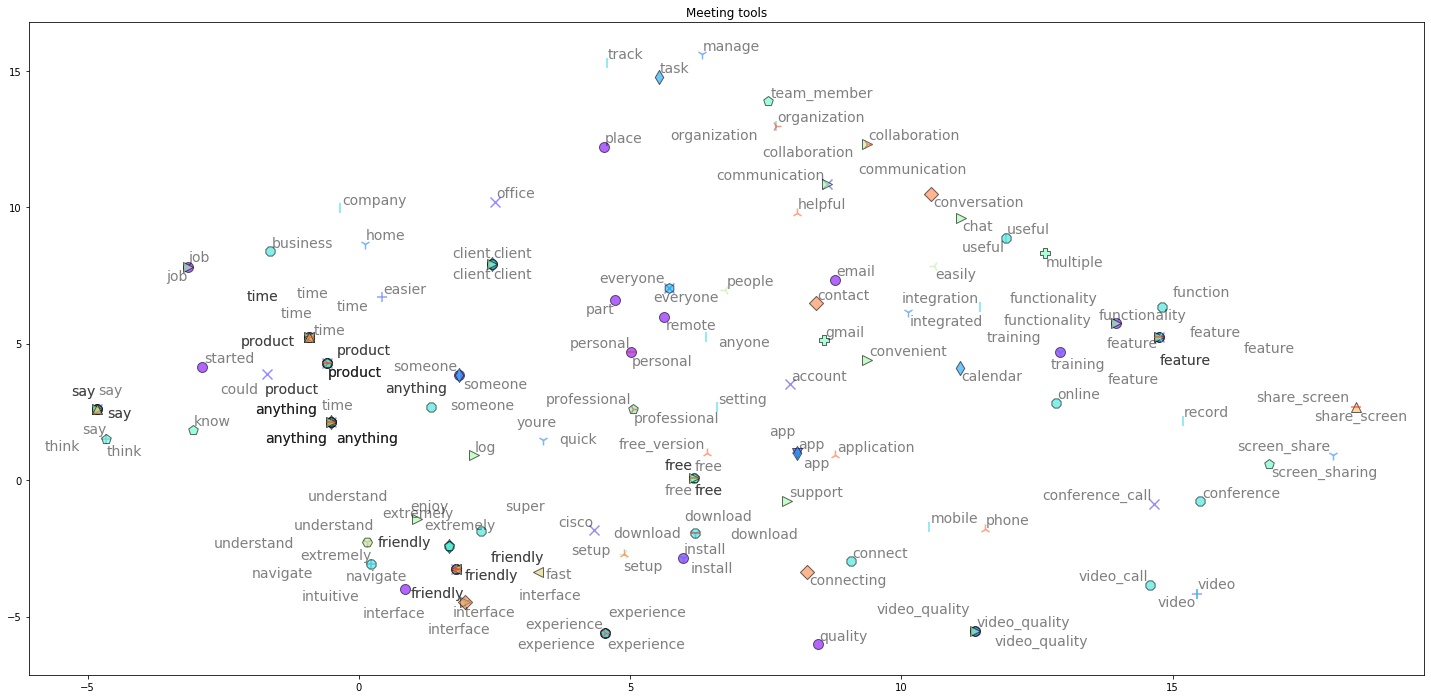

In [33]:
from adjustText import adjust_text
text = []

for cat, color, marker in zip(cat_unique, colors, markers):
    keys = wn_plot['Vantaggi'][wn_plot['Settore'] == cat].values
    df_reduced = wn_umap[wn_umap['token'].isin(keys)]
    if not df_reduced.empty:
        i = 0


        for index,row in df_reduced.iterrows():
            i+=1
            plt.scatter(row['x'], row['y'], c=np.array([color]), alpha=0.6, marker=marker, s=100, edgecolors='black',label=cat if i == 1 else "")
            text.append(plt.annotate(row['token'], alpha=0.5, xy=(row['x'], row['y']), ha='right', va='bottom', size=14))
    
#plt.legend(fontsize=15, loc='best')

plt.title('Meeting tools')


test_Umap=adjust_text(text)
test_Umap


In [ ]:
# !pip install adjustText
from adjustText import adjust_text
text = []
for index, row in top100umap.iterrows():
    plt.scatter(row['x'], row['y'], c='b', alpha=0.6, marker='o', s=100, edgecolors='black')
    text.append(plt.annotate(row['token'], alpha=0.5, xy=(row['x'], row['y']), ha='right', va='bottom', size=14))
adjust_text(text)

In [19]:
#a =calcoliamo la similarità di un vocabolo rispetto a tutti gli altri 
#vocabili appartenenti a quella classe
#b =calcolo la distanza tra un vocabolo rispetto a quelli degli altri 
#gruppi come media
#prendo il gruppo che ha minore distanza rispetto al vocabolo 
#calcolo la distanza tra il gruppo del vocabolo e del gruppo + vicino
#maggiore è la similarità all'interno del gruppo e maggiore
#la distanza dal gruppo + vicino, maggiore la silhoutte per quel vocabolo
wn = pd.read_csv('hypernyms.csv')
wn

,word,category
0,0,digit
1,1,digit
2,10,large integer
3,100,large integer
4,1000,large integer
...,...,...
120375,zip by,travel by
120376,zip up,fasten
120377,zonk out,change state|fall asleep
120378,zoom along,travel rapidly


In [20]:
in_vocab = [True if word in w2v_imported_model.wv.vocab else False for word in wn.word] #ft_imported_model.vocab
wn['in_vocab'] = in_vocab
wn_in_vocab = wn[wn['in_vocab']==True]
wn_in_vocab

NameError: name 'w2v_imported_model' is not defined

In [8]:
#prendi solo quelle che sono nel vocabolario
from sklearn.metrics import silhouette_score
vectors = [w2v_imported_model[i] for i in wn_in_vocab['word']]
vectors
#calcolo la silhoutte media di tutte le classi
#per ottenere l'embedding con la silhoutte maggiore
silhouette_score(vectors, wn_in_vocab['category'])
#silhoutte [-1;1]

-0.042735044

In [9]:
from gensim.models import KeyedVectors
import os

with open ('silhouette_grid.csv', 'w') as file:
    file.write('model,silhouette\n')
    for filename in os.listdir('vantaggi/ft_model'):
        model = KeyedVectors.load_word2vec_format('vantaggi/ft_model/'+filename, binary=False)
        in_vocab = [True if word in model.wv.vocab else False for word in wn.word]
        wn['in_vocab'] = in_vocab
        wn_in_vocab = wn[wn['in_vocab']==True]
        vectors = [model[i] for i in wn_in_vocab['word']]
        sil = silhouette_score(vectors, wn_in_vocab['category'])
        print(f'{filename}: sil={sil}')
        file.write(f'{filename},{sil}\n')
file.close()

C:\Users\illa\anaconda3\lib\site-packages\ipykernel_launcher.py:8: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  


ft_model.vec: sil=-0.1722283661365509


C:\Users\illa\anaconda3\lib\site-packages\ipykernel_launcher.py:8: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  


ft_model_10.vec: sil=-0.14293797314167023


C:\Users\illa\anaconda3\lib\site-packages\ipykernel_launcher.py:8: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  


ft_model_11.vec: sil=-0.15675069391727448


C:\Users\illa\anaconda3\lib\site-packages\ipykernel_launcher.py:8: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  


ft_model_12.vec: sil=-0.14387495815753937


C:\Users\illa\anaconda3\lib\site-packages\ipykernel_launcher.py:8: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  


ft_model_2.vec: sil=-0.15009021759033203


C:\Users\illa\anaconda3\lib\site-packages\ipykernel_launcher.py:8: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  


ft_model_3.vec: sil=-0.18701396882534027


C:\Users\illa\anaconda3\lib\site-packages\ipykernel_launcher.py:8: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  


ft_model_4.vec: sil=-0.160984605550766


C:\Users\illa\anaconda3\lib\site-packages\ipykernel_launcher.py:8: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  


ft_model_5.vec: sil=-0.15977135300636292


C:\Users\illa\anaconda3\lib\site-packages\ipykernel_launcher.py:8: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  


ft_model_6.vec: sil=-0.16009505093097687


C:\Users\illa\anaconda3\lib\site-packages\ipykernel_launcher.py:8: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  


ft_model_7.vec: sil=-0.1614619940519333


C:\Users\illa\anaconda3\lib\site-packages\ipykernel_launcher.py:8: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  


ft_model_8.vec: sil=-0.1427660882472992


C:\Users\illa\anaconda3\lib\site-packages\ipykernel_launcher.py:8: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  


ft_model_9.vec: sil=-0.1615428775548935


C:\Users\illa\anaconda3\lib\site-packages\ipykernel_launcher.py:8: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  


ft_model_star.vec: sil=-0.15164898335933685


In [10]:
from gensim.models import KeyedVectors
import os

with open ('silhouette_grid.csv', 'w') as file:
    file.write('model,silhouette\n')
    for filename in os.listdir('vantaggi/w2v_model'):
        model = KeyedVectors.load_word2vec_format('vantaggi/w2v_model/'+filename, binary=True)
        in_vocab = [True if word in model.wv.vocab else False for word in wn.word]
        wn['in_vocab'] = in_vocab
        wn_in_vocab = wn[wn['in_vocab']==True]
        vectors = [model[i] for i in wn_in_vocab['word']]
        sil = silhouette_score(vectors, wn_in_vocab['category'])
        print(f'{filename}: sil={sil}')
        file.write(f'{filename},{sil}\n')
file.close()

C:\Users\illa\anaconda3\lib\site-packages\ipykernel_launcher.py:8: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  


w2v_model.bin: sil=-0.14877437055110931


C:\Users\illa\anaconda3\lib\site-packages\ipykernel_launcher.py:8: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  


w2v_model_10.bin: sil=-0.17693428695201874


C:\Users\illa\anaconda3\lib\site-packages\ipykernel_launcher.py:8: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  


w2v_model_11.bin: sil=-0.15403491258621216


C:\Users\illa\anaconda3\lib\site-packages\ipykernel_launcher.py:8: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  


w2v_model_12.bin: sil=-0.16592788696289062


C:\Users\illa\anaconda3\lib\site-packages\ipykernel_launcher.py:8: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  


w2v_model_13.bin: sil=-0.1598759889602661


C:\Users\illa\anaconda3\lib\site-packages\ipykernel_launcher.py:8: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  


w2v_model_14.bin: sil=-0.14619006216526031


C:\Users\illa\anaconda3\lib\site-packages\ipykernel_launcher.py:8: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  


w2v_model_15.bin: sil=-0.16105742752552032


C:\Users\illa\anaconda3\lib\site-packages\ipykernel_launcher.py:8: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  


w2v_model_16.bin: sil=-0.1464046984910965


C:\Users\illa\anaconda3\lib\site-packages\ipykernel_launcher.py:8: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  


w2v_model_17.bin: sil=-0.14112374186515808


C:\Users\illa\anaconda3\lib\site-packages\ipykernel_launcher.py:8: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  


w2v_model_18.bin: sil=-0.14365455508232117


C:\Users\illa\anaconda3\lib\site-packages\ipykernel_launcher.py:8: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  


w2v_model_19.bin: sil=-0.17729386687278748


C:\Users\illa\anaconda3\lib\site-packages\ipykernel_launcher.py:8: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  


w2v_model_2.bin: sil=-0.14852921664714813


C:\Users\illa\anaconda3\lib\site-packages\ipykernel_launcher.py:8: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  


w2v_model_3.bin: sil=-0.14758577942848206


C:\Users\illa\anaconda3\lib\site-packages\ipykernel_launcher.py:8: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  


w2v_model_4.bin: sil=-0.14621669054031372


C:\Users\illa\anaconda3\lib\site-packages\ipykernel_launcher.py:8: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  


w2v_model_5.bin: sil=-0.1482672542333603


C:\Users\illa\anaconda3\lib\site-packages\ipykernel_launcher.py:8: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  


w2v_model_6.bin: sil=-0.14852474629878998


C:\Users\illa\anaconda3\lib\site-packages\ipykernel_launcher.py:8: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  


w2v_model_7.bin: sil=-0.15424589812755585


C:\Users\illa\anaconda3\lib\site-packages\ipykernel_launcher.py:8: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  


w2v_model_8.bin: sil=-0.16717170178890228


C:\Users\illa\anaconda3\lib\site-packages\ipykernel_launcher.py:8: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  


w2v_model_9.bin: sil=-0.17788639664649963


In [12]:
from gensim.models import KeyedVectors
wn_plot = pd.read_csv('hypernyms.csv')
best_model = KeyedVectors.load_word2vec_format('vantaggi/w2v_model/w2v_model_17.bin', binary=True)
wn_plot

,word,category
0,0,digit
1,1,digit
2,10,large integer
3,100,large integer
4,1000,large integer
...,...,...
120375,zip by,travel by
120376,zip up,fasten
120377,zonk out,change state|fall asleep
120378,zoom along,travel rapidly


In [13]:
def train_umap(model):
    random.seed(42)
    np.random.seed(42)
    X = model[model.wv.vocab]
    reducer = umap.UMAP(n_neighbors=200, metric='cosine', learning_rate=0.01,
                        n_epochs=2000, spread=5, min_dist=0.5, random_state=42)
    X = model[model.wv.vocab]
    embedding = reducer.fit_transform(X)

    df = pd.DataFrame(embedding)
    df['token'] = model.wv.vocab
    df.columns  = ['x', 'y', 'token']
    return df

word_set = {w for w in wn_plot['word'].str.lower().unique() if w in best_model.vocab}
restrict_w2v(best_model, word_set)
best_umap = train_umap(best_model)
best_umap

C:\Users\illa\anaconda3\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  after removing the cwd from sys.path.
C:\Users\illa\anaconda3\lib\site-packages\ipykernel_launcher.py:7: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  import sys
C:\Users\illa\anaconda3\lib\site-packages\umap\umap_.py:1158: RuntimeWarning: divide by zero encountered in power
  return 1.0 / (1.0 + a * x ** (2 * b))
C:\Users\illa\anaconda3\lib\site-packages\ipykernel_launcher.py:11: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  # This is added back by InteractiveShellApp.init_path()


,x,y,token
0,2.423000,12.448638,meeting
1,-1.398145,-0.971664,software
2,3.415890,-5.023862,feature
3,8.776843,9.360222,work
4,15.321554,4.320170,team
...,...,...,...
1285,7.715359,7.029345,passing
1286,15.328245,-3.235731,transparency
1287,16.208809,-1.415437,glance
1288,15.365294,-1.506417,follower


In [18]:
best_umap_try = best_umap.head(300)

In [19]:
import matplotlib
from matplotlib.pyplot import cm

cat_unique = list(wn_plot.category.unique())
n_cat = len(cat_unique)

markers = [".", "o" ,"v" , "^" , "<" , ">" , "1" , "2" , "3" , "4" , "8" , "s" , "p" , "P" , "*" ,
           "h" , "H" , "+" , "x" , "X" , "D" , "d" , "|" , "_"]
markers = markers[:n_cat]
    
colors = list(matplotlib.colors.cnames.keys())
colors=cm.rainbow(np.linspace(0,1,n_cat))

No handles with labels found to put in legend.


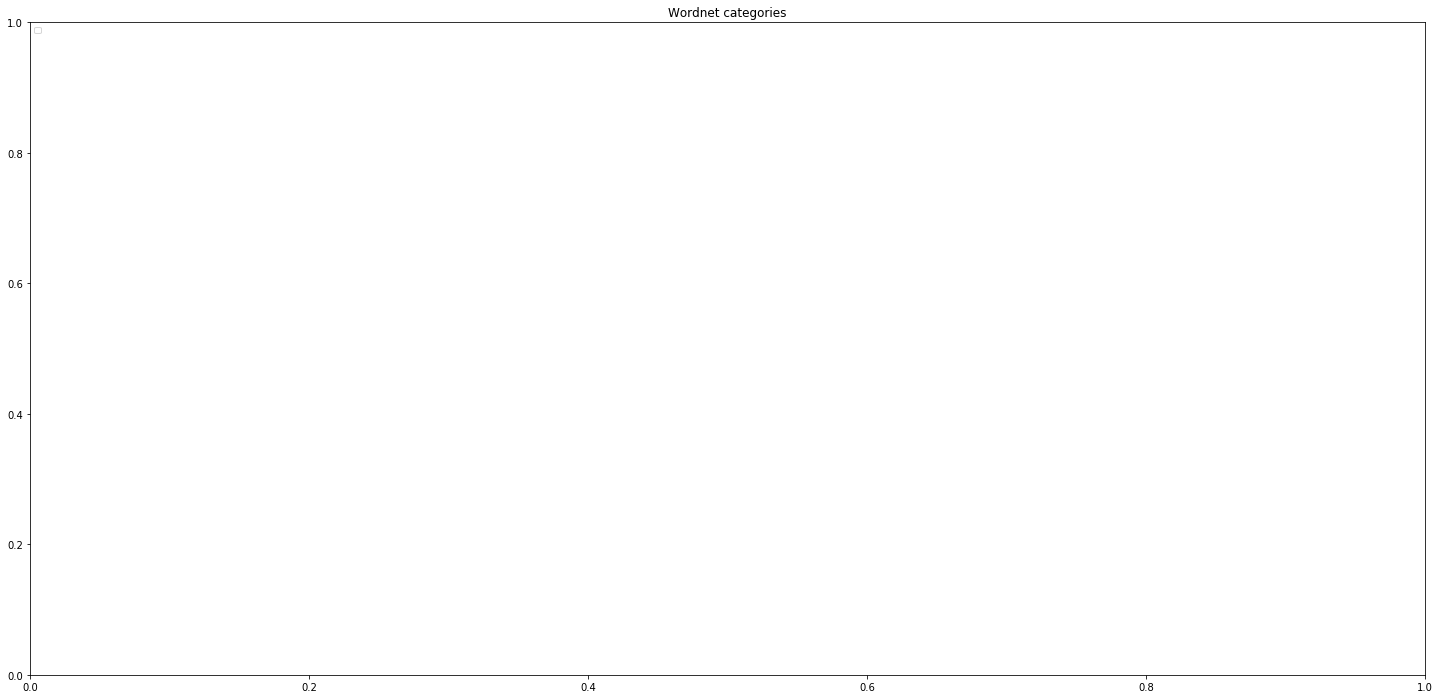

In [21]:
text = []
for cat, color, marker in zip(cat_unique, colors, markers):
    keys = wn_plot['word'][wn_plot['category'] == cat].values
    df_reduced = best_umap_try[best_umap_try['token'].isin(keys)]
    if not df_reduced.empty:
        i = 0
        for index,row in df_reduced.iterrows():
            i+=1
            plt.scatter(row['x'], row['y'], c=np.array([color]), alpha=0.7, label=cat if i == 1 else "", 
                        marker=marker, s=100, edgecolors='black')
            text.append(plt.annotate(row['token'], alpha=0.6, xy=(row['x'], row['y']), ha='right', va='bottom', size=14))
adjust_text(text)
plt.legend(fontsize='small', loc=2)
plt.title('Wordnet categories')
plt.show()